In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np



Created some supplementary graphs for "The Washington Post: Fatal Force" article. Using data and references from https://github.com/washingtonpost/data-police-shootings.

As of July 22, 2018 the database includes: 3372 victims.
The Mean age of the victims were:
37.0
The Median age of the victims were:
35.0
The Mode age of the victims were:
25.0
The Range of the victims were:
85.0
Population Standard Deviation
12.986370123009703


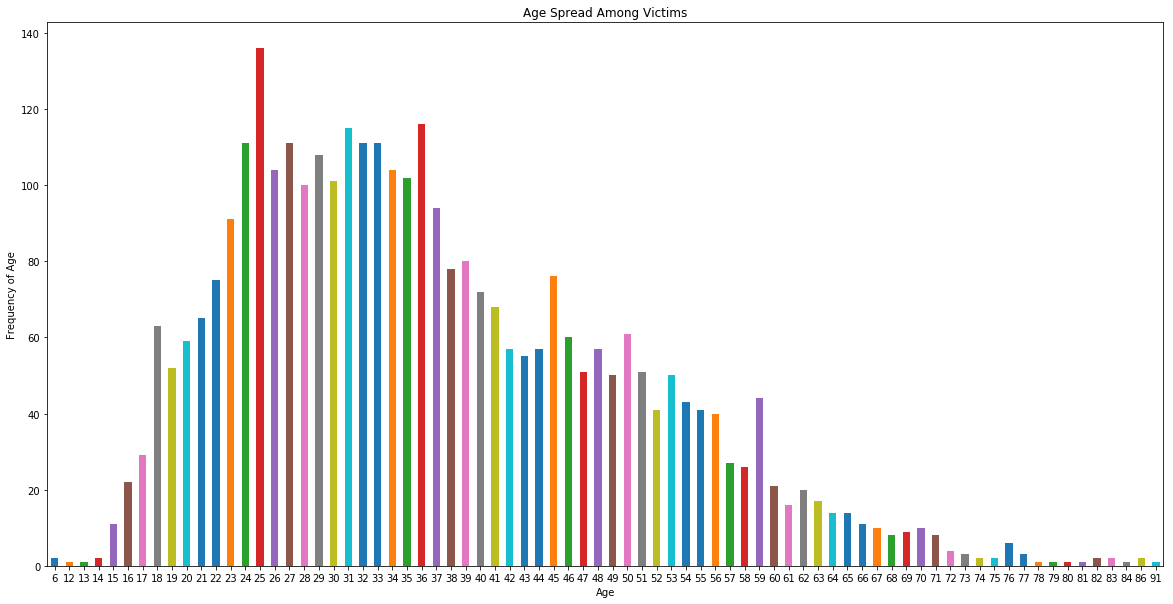

In [158]:
df = pd.read_csv('fatal-police-shootings-data.csv',parse_dates=True)
df.dropna(subset=['age'], inplace=True)
num_of_vics = len(df['id'])
import statistics as stats
df['average_of_victims'] = sum(df['age']) / len(df['age'])
print('As of July 22, 2018 the database includes: ' + str(num_of_vics) + ' victims.')
#Mean
print("The Mean age of the victims were:")
print(round(df['average_of_victims'][0]))
#Median
print("The Median age of the victims were:")
print(stats.median(df['age']))
#Mode
print("The Mode age of the victims were:")
print(stats.mode(df['age']))
#Range
print("The Range of the victims were:")
print(max(df['age'])-min(df['age']))
print("Population Standard Deviation:")
print(np.std(df['age']))




df['age'].astype(int).value_counts().sort_index().plot('bar',rot=0,figsize=(20,10))
plt.ylabel('Frequency of Age')
plt.xlabel('Age')
plt.title('Age Spread Among Victims')
plt.show()

The percentage of victims who had signs of mental illness were:
       signs_of_mental_illness
False                75.919336
True                 24.080664


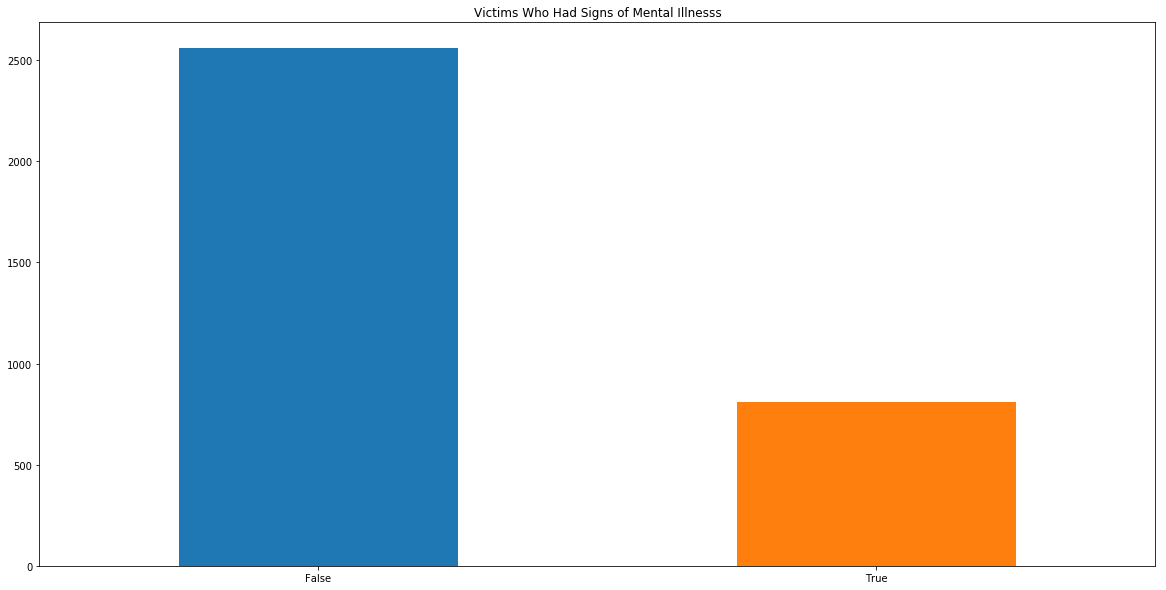

In [87]:
df['signs_of_mental_illness'].value_counts().plot('bar',rot=0,figsize=(20,10))
num_of_victims = (len(df['signs_of_mental_illness']))
plt.title("Victims Who Had Signs of Mental Illnesss")
percentage_of_signs = str(df['signs_of_mental_illness'].value_counts("True").to_frame()*100)
print ("The percentage of victims who had signs of mental illness were:")
print (percentage_of_signs)
num_of_victims = (len(df['signs_of_mental_illness']))

plt.show()

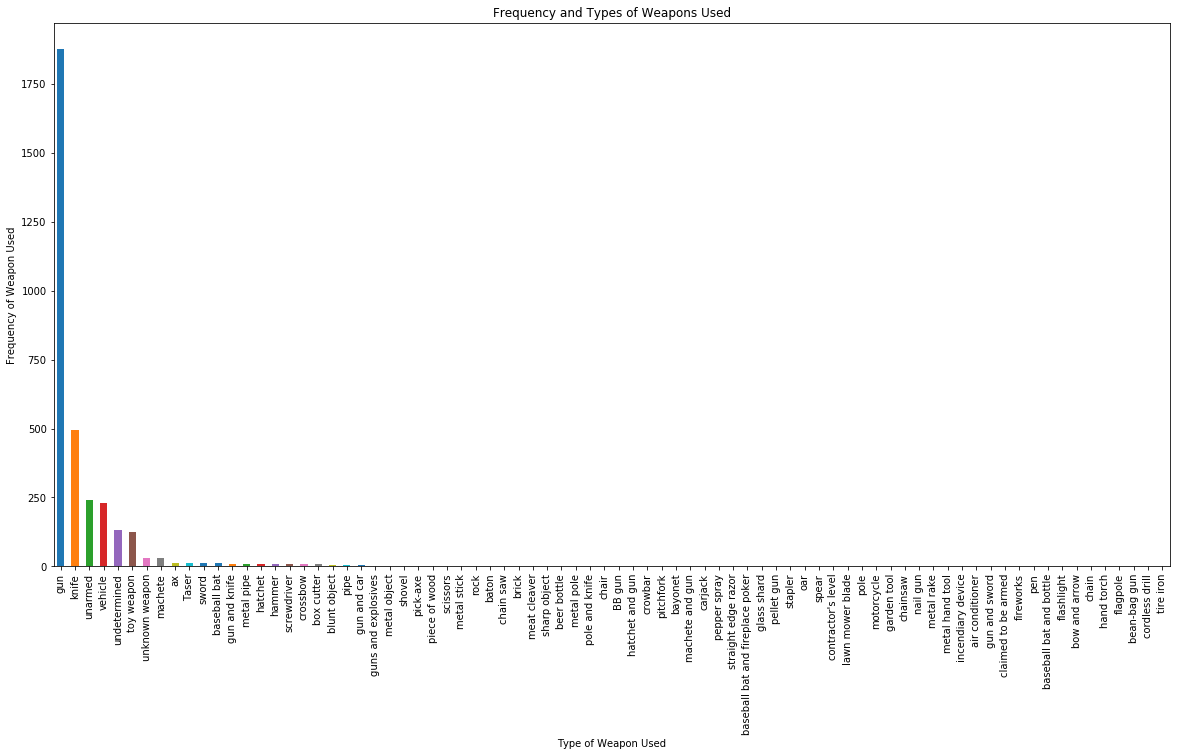

In [43]:
df['armed'].value_counts().plot('bar',figsize=(20,10))
plt.ylabel("Frequency of Weapon Used")
plt.xlabel("Type of Weapon Used")
plt.title("Frequency and Types of Weapons Used")
plt.show()

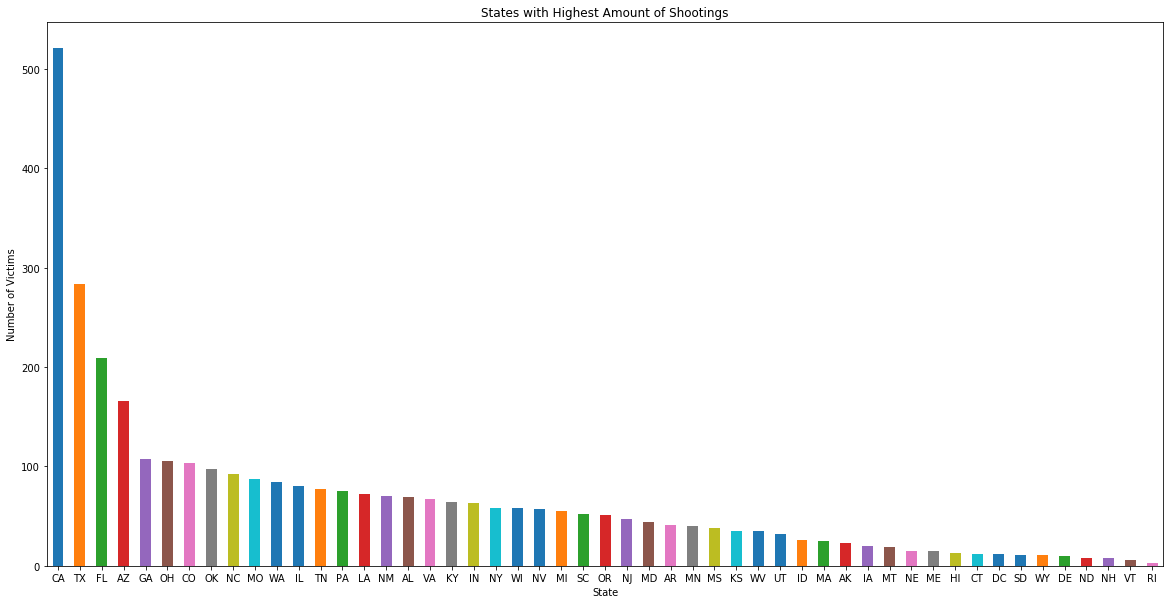

In [126]:
df['state'].value_counts().plot('bar',rot=0, figsize=(20,10))
plt.title("States with Highest Amount of Shootings")
plt.ylabel("Number of Victims")
plt.xlabel("State")
plt.show()

Race: 
W: White, non-Hispanic 
B: Black, non-Hispanic 
A: Asian 
N: Native American 
H: Hispanic 
O: Other


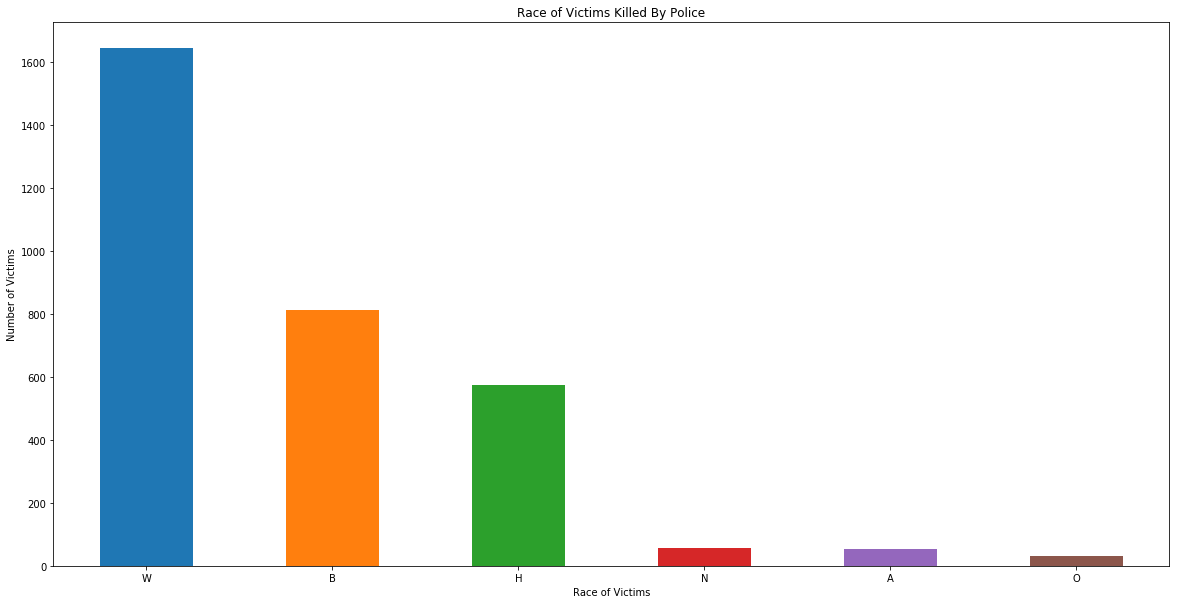

   race
W  1643
B   812
H   573
N    55
A    54
O    32


In [130]:
df['race'].value_counts().plot('bar',rot=0, figsize=(20,10))
plt.title("Race of Victims Killed By Police")
plt.ylabel("Number of Victims")
plt.xlabel("Race of Victims")
print ('Race: \nW: White, non-Hispanic \nB: Black, non-Hispanic \nA: Asian \nN: Native American \nH: Hispanic \nO: Other')
plt.show()
print(df['race'].value_counts().to_frame())
#Cannot make a legend for some reason

   gender
M    3225
F     146


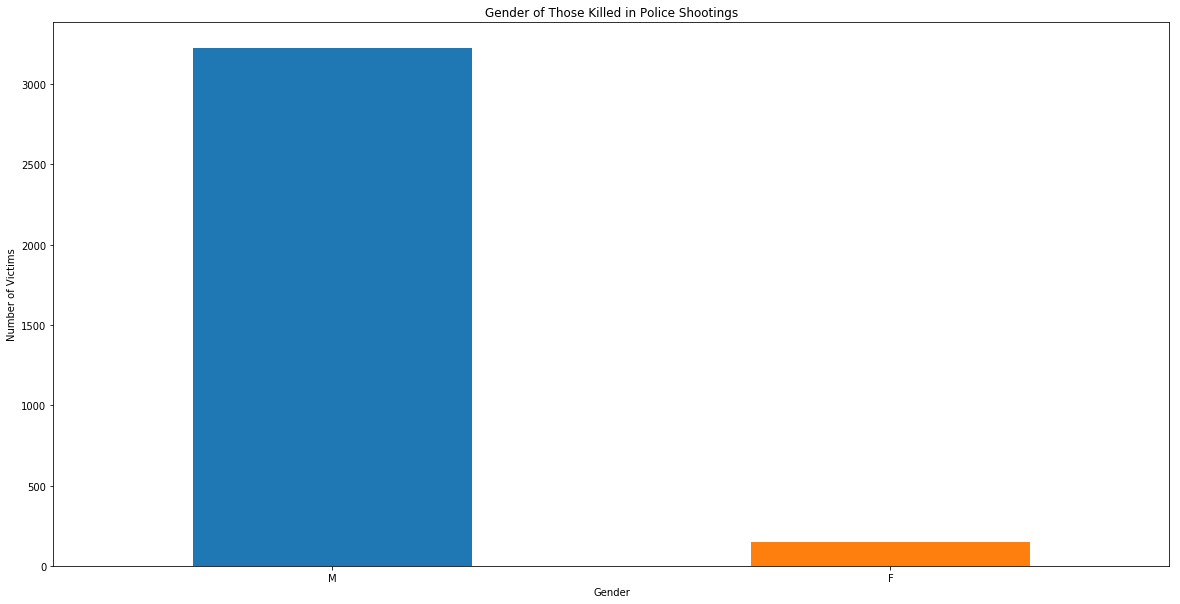

In [109]:
df['gender'].value_counts().plot('bar',rot=0, figsize=(20,10))
plt.title("Gender of Those Killed in Police Shootings")
plt.ylabel("Number of Victims")
plt.xlabel("Gender")
print(df['gender'].value_counts().to_frame())
plt.show()

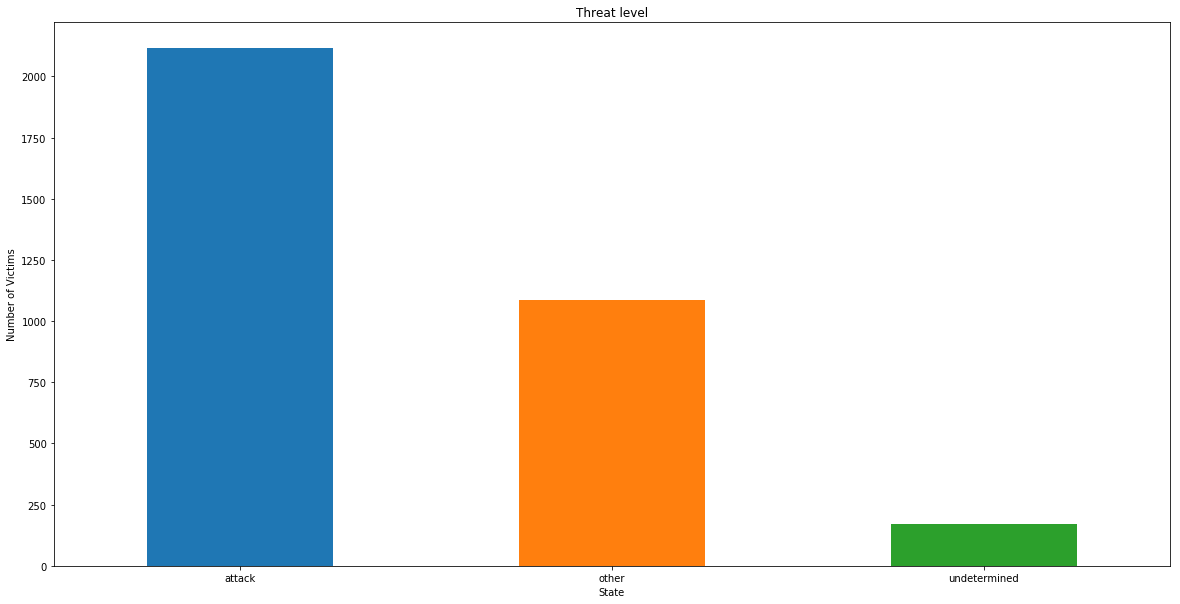

The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. -Washington Post


In [151]:
df['threat_level'].value_counts().plot('bar',rot=0, figsize=(20,10))
plt.title("Threat level")
plt.ylabel("Number of Victims")
plt.xlabel("State")
plt.show()
print("The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. -Washington Post")

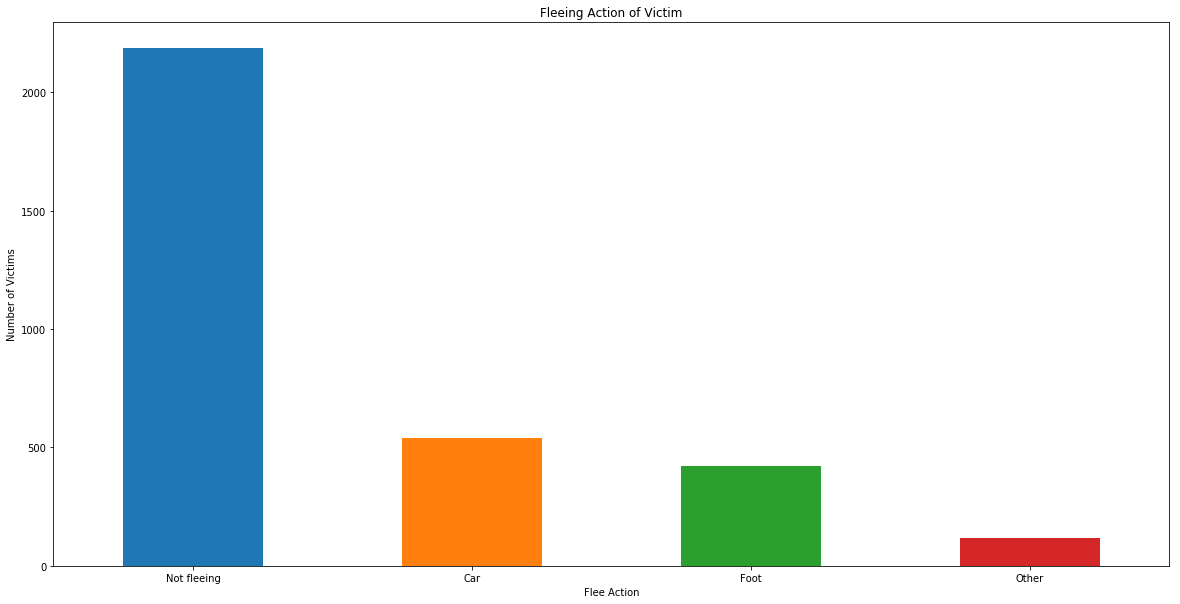

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is moving away from officers (fleeing) and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police; while fleeing could begin slightly earlier and involve a chase. -Washington Post


In [150]:
df['flee'].value_counts().plot('bar',rot=0, figsize=(20,10))
plt.title("Fleeing Action of Victim")
plt.ylabel("Number of Victims")
plt.xlabel("Flee Action")
plt.show()
print("The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is moving away from officers (fleeing) and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police; while fleeing could begin slightly earlier and involve a chase. -Washington Post")

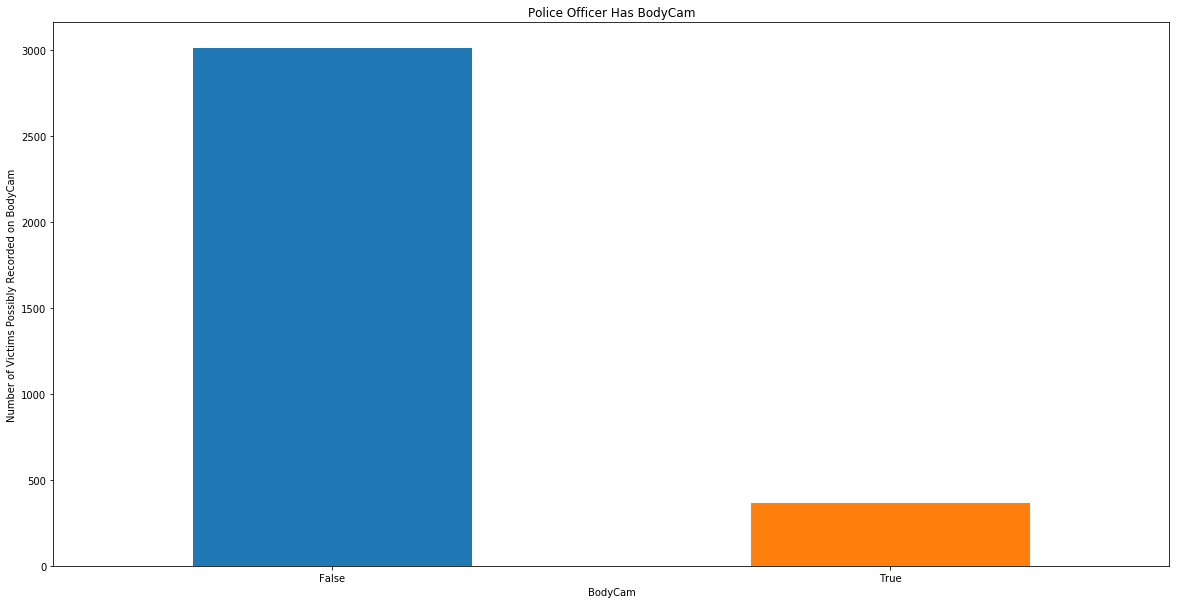

body_camera: News reports have indicated an officer was wearing a body camera and it may have recorded some portion  of the incident. - Wahington Post


In [149]:
df['body_camera'].value_counts().plot('bar',rot=0, figsize=(20,10))
plt.title("Police Officer Has BodyCam")
plt.ylabel("Number of Victims Possibly Recorded on BodyCam")
plt.xlabel("BodyCam")
plt.show()
print("body_camera: News reports have indicated an officer was wearing a body camera and it may have recorded some portion  of the incident. - Wahington Post")

In [154]:
print("Cities with most shootings (Truncated):")
#Dataset too large and cumbersome to plot
print(df['city'].value_counts().to_frame())

Cities with most shootings (Truncated):
                  city
Los Angeles         49
Phoenix             47
Houston             33
Chicago             29
Las Vegas           29
Columbus            28
Albuquerque         23
Miami               21
San Antonio         21
Austin              21
Tucson              20
St. Louis           19
Oklahoma City       19
Denver              17
Kansas City         17
Jacksonville        16
Bakersfield         15
Tulsa               15
San Francisco       15
Louisville          14
Indianapolis        14
Orlando             13
Mesa                13
Charlotte           13
Washington          13
Dallas              13
San Jose            12
New York            12
Fresno              11
Philadelphia        11
...                ...
Spring               1
Palo Alto            1
Mabank               1
Neshoba County       1
Blue Summit          1
Roslindale           1
Tehachapi            1
Kellyville           1
Grundy               1
Walls            